In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
df=pd.read_csv('rideshare_kaggle.csv')

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
keep_cols = [
    "hour", "day", "month", "source", "destination","datetime",
    "cab_type", "name", "price", "distance", "surge_multiplier",
    "temperature", "apparentTemperature", "precipIntensity","precipProbability",
    "humidity", "windSpeed","windGust", "visibility", "cloudCover", "short_summary"
]

In [7]:
df_clean = df[keep_cols]

In [8]:
df_clean.head()

,hour,day,month,source,destination,datetime,cab_type,name,price,distance,...,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,cloudCover,short_summary
0,9,16,12,Haymarket Square,North Station,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,...,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,0.72,Mostly Cloudy
1,2,27,11,Haymarket Square,North Station,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,...,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,1.00,Rain
2,1,28,11,Haymarket Square,North Station,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,...,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,0.03,Clear
3,4,30,11,Haymarket Square,North Station,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,...,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,0.00,Clear
4,3,29,11,Haymarket Square,North Station,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,...,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,0.44,Partly Cloudy


In [9]:
df_clean.to_csv("rideshare_cleaned.csv", index=False)

In [10]:
print("Remaining columns:", df_clean.columns.tolist())

Remaining columns: ['hour', 'day', 'month', 'source', 'destination', 'datetime', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'cloudCover', 'short_summary']


In [11]:
df_clean.isnull().sum()


,0
hour,0
day,0
month,0
source,0
destination,0
datetime,0
cab_type,0
name,0
price,55095
distance,0


In [12]:
df_clean.shape

(693071, 21)

In [13]:
df=pd.read_csv('rideshare_cleaned.csv')

In [14]:
df.shape

(693071, 21)

In [15]:
df= df.dropna(subset=["price"])

In [16]:
df.shape

(637976, 21)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hour                 637976 non-null  int64  
 1   day                  637976 non-null  int64  
 2   month                637976 non-null  int64  
 3   source               637976 non-null  object 
 4   destination          637976 non-null  object 
 5   datetime             637976 non-null  object 
 6   cab_type             637976 non-null  object 
 7   name                 637976 non-null  object 
 8   price                637976 non-null  float64
 9   distance             637976 non-null  float64
 10  surge_multiplier     637976 non-null  float64
 11  temperature          637976 non-null  float64
 12  apparentTemperature  637976 non-null  float64
 13  precipIntensity      637976 non-null  float64
 14  precipProbability    637976 non-null  float64
 15  humidity             6

In [18]:
num_cols = [
    "distance", "surge_multiplier", "temperature", "apparentTemperature",
    "precipIntensity", "precipProbability", "humidity",
    "windSpeed", "windGust", "visibility", "cloudCover"
]

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)



/tmp/ipython-input-705272955.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [19]:
cat_cols = ["source", "destination", "cab_type", "name", "short_summary"]
for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)

/tmp/ipython-input-1003078664.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


In [20]:
df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
df.dropna(subset=["datetime"], inplace=True)

In [21]:
df.duplicated().sum()

np.int64(940)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df = df[(df["distance"] > 0) & (df["distance"] < 100)]

In [24]:
df = df[(df["surge_multiplier"] >= 1) & (df["surge_multiplier"] <= 3)]

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df['price'] = df['price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)


In [27]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Check again
print(df['price'].dtype)   # should be float64 now
print(df['price'].isna().sum())  # see how many got converted to NaN

float64
0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637036 entries, 0 to 637035
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   hour                 637036 non-null  int64         
 1   day                  637036 non-null  int64         
 2   month                637036 non-null  int64         
 3   source               637036 non-null  object        
 4   destination          637036 non-null  object        
 5   datetime             637036 non-null  datetime64[ns]
 6   cab_type             637036 non-null  object        
 7   name                 637036 non-null  object        
 8   price                637036 non-null  float64       
 9   distance             637036 non-null  float64       
 10  surge_multiplier     637036 non-null  float64       
 11  temperature          637036 non-null  float64       
 12  apparentTemperature  637036 non-null  float64       
 13  precipIntensit

In [29]:
q1, q3 = df["price"].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [30]:
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]

In [31]:
print("📊 Price Stats:")
print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers detected: {outliers.shape[0]} rows")

📊 Price Stats:
Q1: 9.0, Q3: 22.5, IQR: 13.5
Lower Bound: -11.25, Upper Bound: 42.75
Outliers detected: 5589 rows


Text(0.5, 1.0, 'Boxplot of Price')

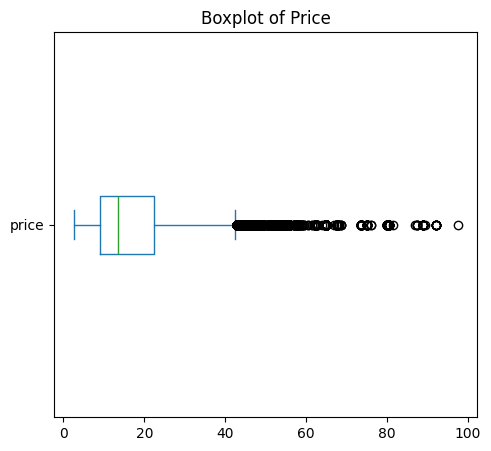

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df["price"].plot(kind="box", vert=False)
plt.title("Boxplot of Price")

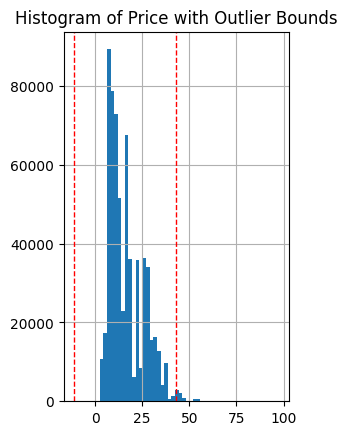

In [33]:
plt.subplot(1,2,2)
df["price"].hist(bins=50)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1)
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Price with Outlier Bounds")
plt.show()

In [34]:
# Drop outliers
df = df[(df["price"] >= 0) & (df["price"] <= upper_bound)].copy()

In [35]:
df.shape

(631447, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631447 entries, 0 to 637035
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   hour                 631447 non-null  int64         
 1   day                  631447 non-null  int64         
 2   month                631447 non-null  int64         
 3   source               631447 non-null  object        
 4   destination          631447 non-null  object        
 5   datetime             631447 non-null  datetime64[ns]
 6   cab_type             631447 non-null  object        
 7   name                 631447 non-null  object        
 8   price                631447 non-null  float64       
 9   distance             631447 non-null  float64       
 10  surge_multiplier     631447 non-null  float64       
 11  temperature          631447 non-null  float64       
 12  apparentTemperature  631447 non-null  float64       
 13  precipIntensity    

In [37]:
df.head()

,hour,day,month,source,destination,datetime,cab_type,name,price,distance,...,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,cloudCover,short_summary
0,9,16,12,Haymarket Square,North Station,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,...,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,0.72,Mostly Cloudy
1,2,27,11,Haymarket Square,North Station,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,...,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,1.00,Rain
2,1,28,11,Haymarket Square,North Station,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,...,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,0.03,Clear
3,4,30,11,Haymarket Square,North Station,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,...,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,0.00,Clear
4,3,29,11,Haymarket Square,North Station,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,...,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,0.44,Partly Cloudy


Feature Engineering

In [38]:
df['day_of_week'] = df['datetime'].dt.dayofweek  # 0=Monday
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['time_of_day'] = pd.cut(
    df['hour'],
    bins=[-1,6,12,18,23],
    labels=['Night','Morning','Afternoon','Evening']
)

In [39]:
df['route'] = df['source'] + "_" + df['destination']

In [40]:
# Define bins and labels
bins = [0, 2.8, 5.5, 8]  # upper limit slightly above max
labels = ['short', 'medium', 'long']

# Create categorical column
df['distance_category'] = pd.cut(df['distance'], bins=bins, labels=labels, include_lowest=True)


In [41]:
# Feels like difference (real temp vs apparent temp)
df['feels_like_diff'] = df['temperature'] - df['apparentTemperature']

# Bad weather flag: rain probability > 0.5 OR low visibility (<3 miles/km) OR heavy cloud cover
df['bad_weather'] = (
    (df['precipProbability'] > 0.5) |
    (df['visibility'] < 3) |
    (df['cloudCover'] > 0.7)
).astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631447 entries, 0 to 637035
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   hour                 631447 non-null  int64         
 1   day                  631447 non-null  int64         
 2   month                631447 non-null  int64         
 3   source               631447 non-null  object        
 4   destination          631447 non-null  object        
 5   datetime             631447 non-null  datetime64[ns]
 6   cab_type             631447 non-null  object        
 7   name                 631447 non-null  object        
 8   price                631447 non-null  float64       
 9   distance             631447 non-null  float64       
 10  surge_multiplier     631447 non-null  float64       
 11  temperature          631447 non-null  float64       
 12  apparentTemperature  631447 non-null  float64       
 13  precipIntensity    

In [43]:
df.shape

(631447, 28)

In [44]:
df.head()

,hour,day,month,source,destination,datetime,cab_type,name,price,distance,...,visibility,cloudCover,short_summary,day_of_week,is_weekend,time_of_day,route,distance_category,feels_like_diff,bad_weather
0,9,16,12,Haymarket Square,North Station,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,...,10.000,0.72,Mostly Cloudy,6,1,Morning,Haymarket Square_North Station,short,5.22,1
1,2,27,11,Haymarket Square,North Station,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,...,4.786,1.00,Rain,1,0,Night,Haymarket Square_North Station,short,6.23,1
2,1,28,11,Haymarket Square,North Station,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,...,10.000,0.03,Clear,2,0,Night,Haymarket Square_North Station,short,5.40,0
3,4,30,11,Haymarket Square,North Station,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,...,10.000,0.00,Clear,4,0,Night,Haymarket Square_North Station,short,4.75,0
4,3,29,11,Haymarket Square,North Station,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,...,10.000,0.44,Partly Cloudy,3,0,Night,Haymarket Square_North Station,short,6.56,0


EDA

                 hour            day          month     source destination  \
count   631447.000000  631447.000000  631447.000000     631447      631447   
unique            NaN            NaN            NaN         12          12   
top               NaN            NaN            NaN  North End    Back Bay   
freq              NaN            NaN            NaN      53074       52983   
mean        11.618342      17.791609      11.586946        NaN         NaN   
min          0.000000       1.000000      11.000000        NaN         NaN   
25%          6.000000      13.000000      11.000000        NaN         NaN   
50%         12.000000      17.000000      12.000000        NaN         NaN   
75%         18.000000      28.000000      12.000000        NaN         NaN   
max         23.000000      30.000000      12.000000        NaN         NaN   
std          6.948319       9.981600       0.492383        NaN         NaN   

                             datetime cab_type      name       

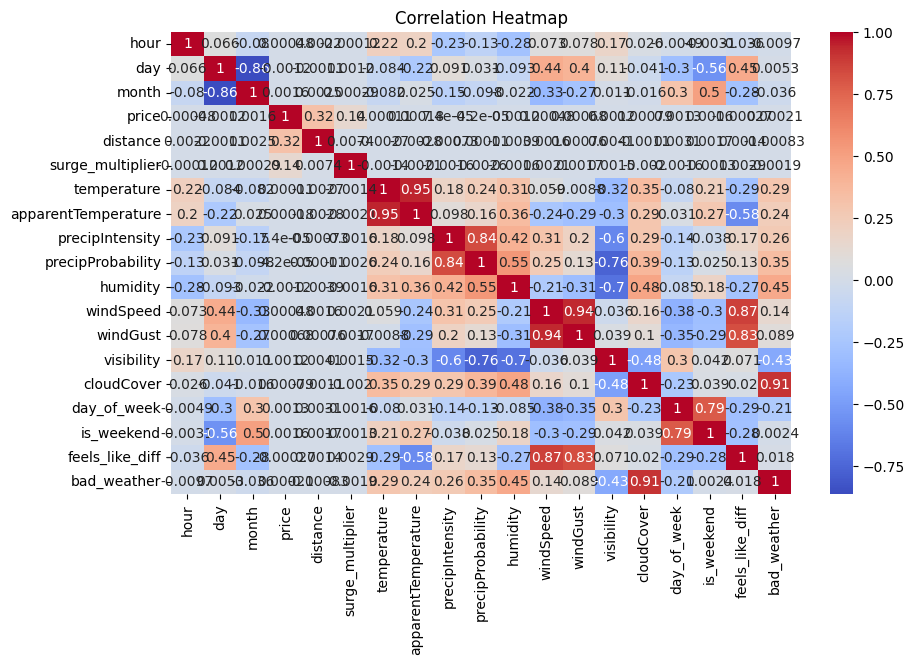

In [45]:
#Basic Descriptive Statistics
print(df.describe(include='all'))
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


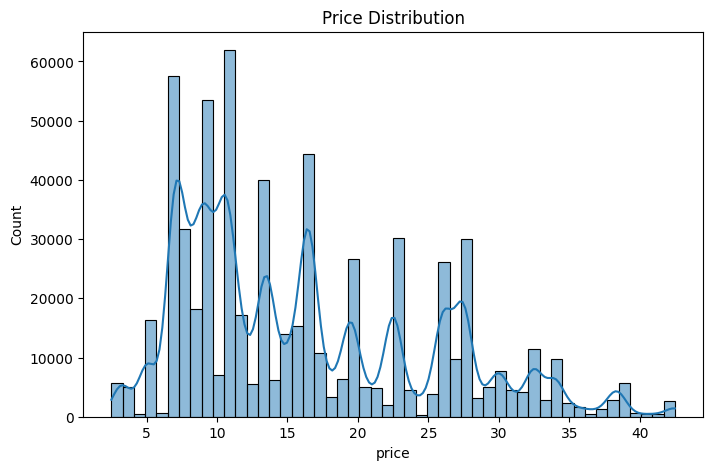

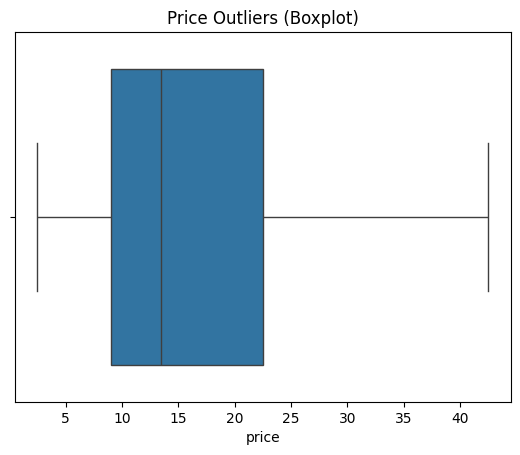

In [46]:
#Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

sns.boxplot(x=df['price'])
plt.title("Price Outliers (Boxplot)")
plt.show()


/tmp/ipython-input-2906955783.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='price', data=df, ci=None)


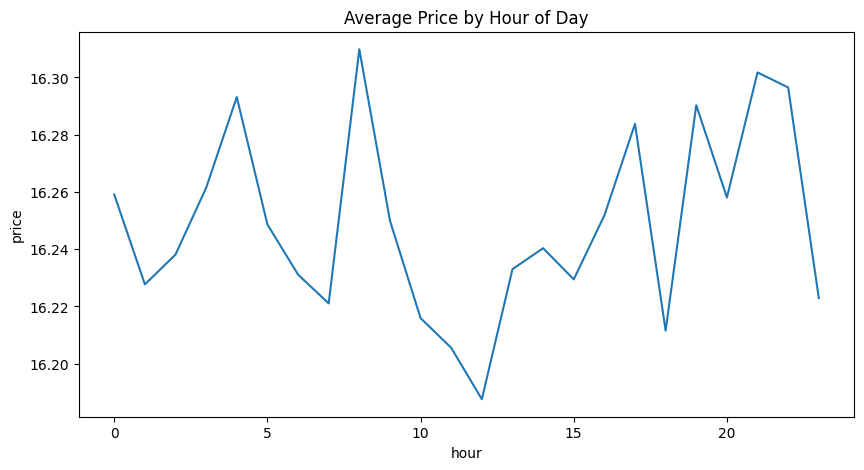

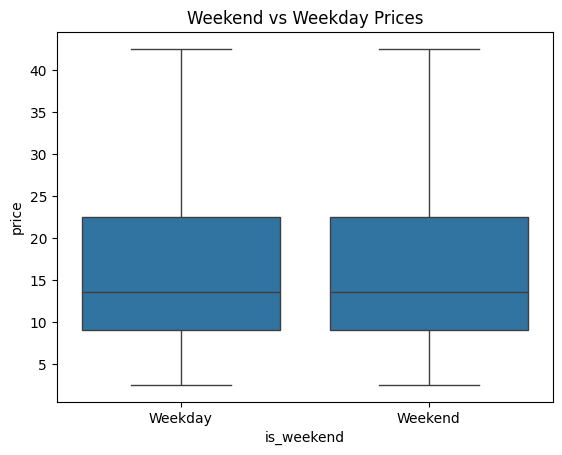

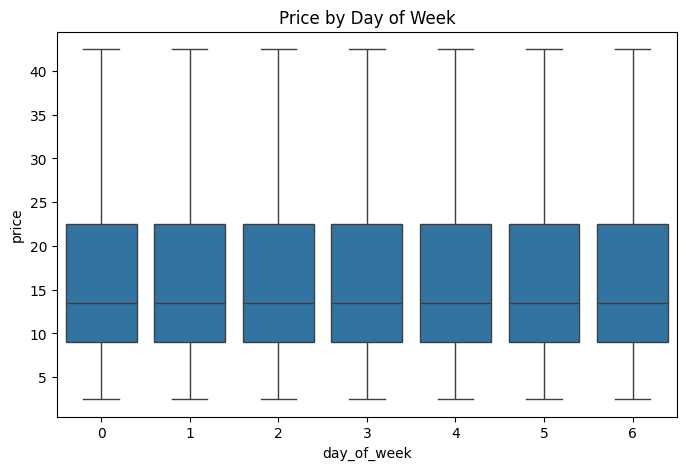

In [47]:
# Average price by hour
plt.figure(figsize=(10,5))
sns.lineplot(x='hour', y='price', data=df, ci=None)
plt.title("Average Price by Hour of Day")
plt.show()

# Weekend vs weekday
sns.boxplot(x='is_weekend', y='price', data=df)
plt.title("Weekend vs Weekday Prices")
plt.xticks([0,1], ['Weekday','Weekend'])
plt.show()

# Day of week
plt.figure(figsize=(8,5))
sns.boxplot(x='day_of_week', y='price', data=df)
plt.title("Price by Day of Week")
plt.show()


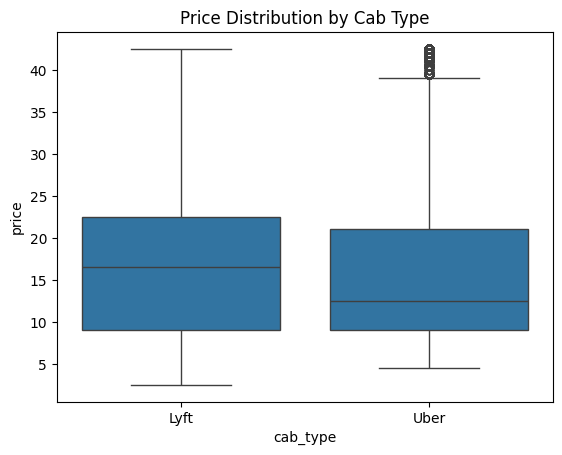

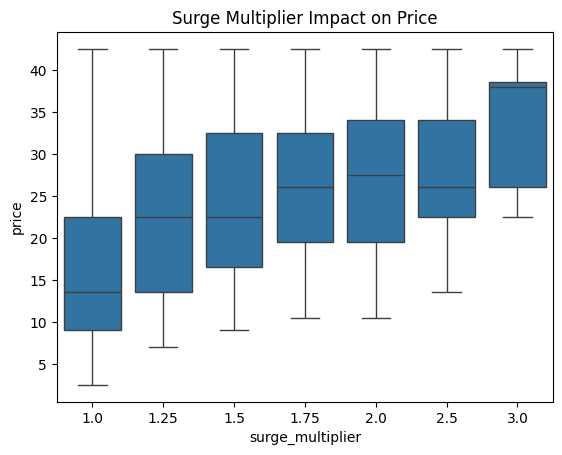

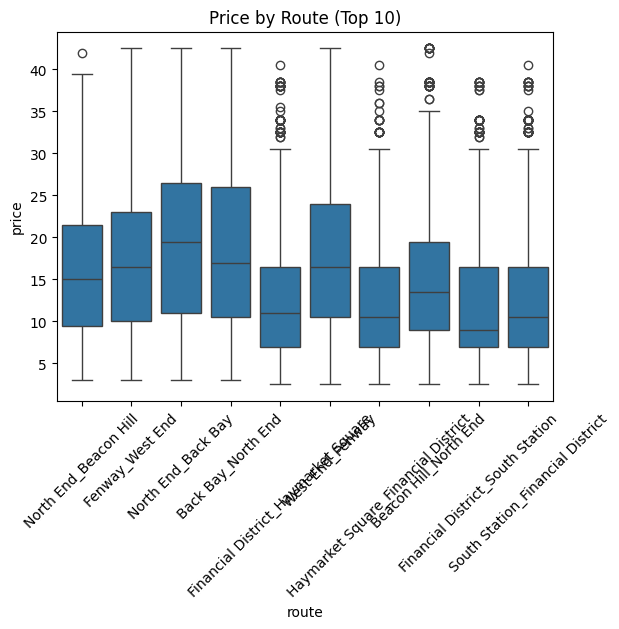

In [48]:
# Cab type
sns.boxplot(x='cab_type', y='price', data=df)
plt.title("Price Distribution by Cab Type")
plt.show()

# Surge multiplier
sns.boxplot(x='surge_multiplier', y='price', data=df)
plt.title("Surge Multiplier Impact on Price")
plt.show()

# Route (top 10 only)
top_routes = df['route'].value_counts().nlargest(10).index
sns.boxplot(x='route', y='price', data=df[df['route'].isin(top_routes)])
plt.xticks(rotation=45)
plt.title("Price by Route (Top 10)")
plt.show()


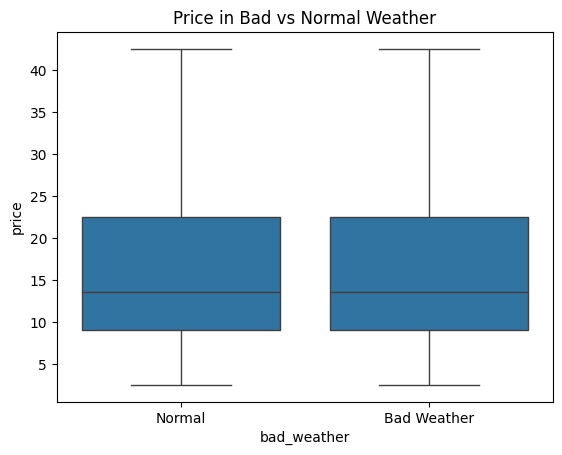

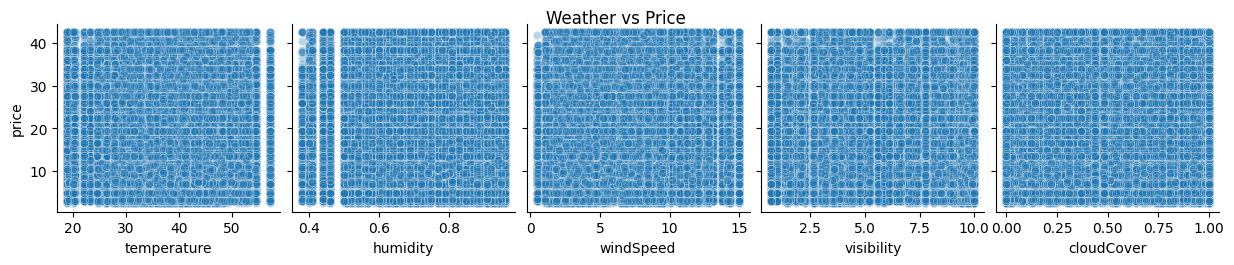

In [49]:
# Bad weather vs price
sns.boxplot(x='bad_weather', y='price', data=df)
plt.title("Price in Bad vs Normal Weather")
plt.xticks([0,1], ['Normal','Bad Weather'])
plt.show()

# Correlation with weather features
weather_features = ['temperature','humidity','windSpeed','visibility','cloudCover']
sns.pairplot(df, x_vars=weather_features, y_vars='price', kind='scatter', plot_kws={'alpha':0.3})
plt.suptitle("Weather vs Price", y=1.02)
plt.show()


/tmp/ipython-input-611783153.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demand = df.groupby(price_bins).size()


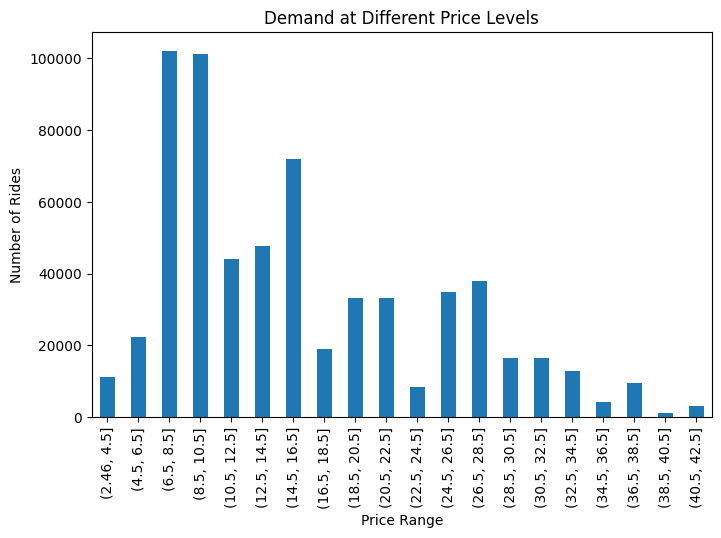

In [50]:
# Demand curve (price vs ride count)
price_bins = pd.cut(df['price'], bins=20)
demand = df.groupby(price_bins).size()

plt.figure(figsize=(8,5))
demand.plot(kind='bar')
plt.title("Demand at Different Price Levels")
plt.xlabel("Price Range")
plt.ylabel("Number of Rides")
plt.show()


In [51]:
price_by_distance = df.groupby('distance_category')['price'].mean()
print(price_by_distance)

distance_category
short     14.789809
medium    19.801148
long      22.283269
Name: price, dtype: float64


/tmp/ipython-input-3224821617.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_distance = df.groupby('distance_category')['price'].mean()


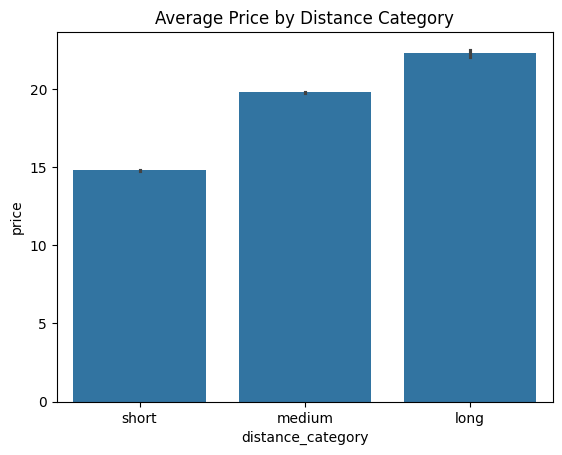

In [52]:
sns.barplot(x='distance_category', y='price', data=df, order=['short','medium','long'])
plt.title("Average Price by Distance Category")
plt.show()

In [53]:
# Bin continuous variables
df["surge_bin"] = pd.cut(df["surge_multiplier"], bins=[1, 1.5, 2, 5], labels=[ "mild", "high", "extreme"])

In [79]:
# Create price bins (you can adjust according to data distribution)
df['price_bin'] = pd.qcut(df['price'], q=2, duplicates='drop')  # 10 quantiles

# Step 1: Choose grouping keys (context where demand changes)
group_cols = ["cab_type", "name", "hour", "is_weekend","surge_multiplier"]

# Step 2: Aggregate bookings per price point
df_demand = (
    df.groupby(group_cols + ["price"])
      .size()
      .reset_index(name="bookings")
)

# Example preview
print(df_demand.head(100))

   cab_type name  hour  is_weekend  surge_multiplier  price  bookings
0      Lyft  Lux     0           0              1.00   10.5       104
1      Lyft  Lux     0           0              1.00   11.0        92
2      Lyft  Lux     0           0              1.00   13.5       414
3      Lyft  Lux     0           0              1.00   16.5       410
4      Lyft  Lux     0           0              1.00   19.5       320
..      ...  ...   ...         ...               ...    ...       ...
95     Lyft  Lux     1           0              1.50   27.5         5
96     Lyft  Lux     1           0              1.50   30.0         3
97     Lyft  Lux     1           0              1.50   34.0         2
98     Lyft  Lux     1           0              1.50   42.5         1
99     Lyft  Lux     1           0              1.75   19.5         1

[100 rows x 7 columns]


In [80]:
# ML imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import joblib

# ====================================
# Step 1: Features & Target
# ====================================
# Use reduced important features
selected_features = [
    "cab_type", "name", "hour", "is_weekend", "surge_multiplier", "price"
]

X = df_demand[selected_features]
y = df_demand["bookings"]  # demand is the target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ====================================
# Step 2: Preprocessing
# ====================================
num_features = ["price", "hour", "surge_multiplier"]
cat_features = ["cab_type", "name", "is_weekend"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

# ====================================
# Step 3: Models to Try
# ====================================
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42, max_depth=10),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15),
    "LightGBM": LGBMRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
}

results = {}

# ====================================
# Step 4: Train & Evaluate
# ====================================
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}
    print(f"📊 {name}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")

# ====================================
# Step 5: Choose Best Model
# ====================================
best_model_name = max(results, key=lambda x: results[x]["R2"])
print("\n✅ Best Model Selected:", best_model_name, results[best_model_name])

# Refit best model on full training set
best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", models[best_model_name])
])
best_pipeline.fit(X_train, y_train)

# Save best model
joblib.dump(best_pipeline, "best_dynamic_pricing_model.pkl")
print("💾 Model saved as best_dynamic_pricing_model.pkl")




📊 LinearRegression: RMSE=59.58, MAE=36.44, R²=0.2772
📊 DecisionTree: RMSE=17.02, MAE=8.00, R²=0.9410
📊 RandomForest: RMSE=8.82, MAE=4.40, R²=0.9841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 14417, number of used features: 19
[LightGBM] [Info] Start training from score 35.034126


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


📊 LightGBM: RMSE=10.38, MAE=5.80, R²=0.9781

✅ Best Model Selected: RandomForest {'RMSE': np.float64(8.82496116217147), 'MAE': 4.4004999616495, 'R2': 0.9841403128756103}
💾 Model saved as best_dynamic_pricing_model.pkl


In [81]:
# ====================================
# Step 6: Revenue Optimization Function
# ====================================
def suggest_optimal_price(pipeline, features, price_range=(5, 50), step=1):
    prices = []
    revenues = []

    for p in range(price_range[0], price_range[1] + 1, step):
        feat = features.copy()
        feat["price"] = p
        demand_pred = pipeline.predict(pd.DataFrame([feat]))[0]
        revenue = p * demand_pred
        prices.append(p)
        revenues.append(revenue)

    best_idx = np.argmax(revenues)
    return prices[best_idx], revenues[best_idx]

# ✅ Example test
sample = {
    "cab_type": "Lyft",
    "name": "Lux Black XL",
    "hour": 18,
    "is_weekend": 0,
    "surge_multiplier": 1.2,
    "price": 20  # initial placeholder
}

best_price, best_revenue = suggest_optimal_price(best_pipeline, sample, price_range=(5, 40))
print(f"\n💡 Suggested Optimal Price: {best_price}")
print(f"📈 Expected Revenue: {best_revenue:.2f}")


💡 Suggested Optimal Price: 36
📈 Expected Revenue: 654.84


In [82]:
df.head()

,hour,day,month,source,destination,datetime,cab_type,name,price,distance,...,short_summary,day_of_week,is_weekend,time_of_day,route,distance_category,feels_like_diff,bad_weather,surge_bin,price_bin
0,9,16,12,Haymarket Square,North Station,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,6,1,Morning,Haymarket Square_North Station,short,5.22,1,NaN,"(2.499, 13.5]"
1,2,27,11,Haymarket Square,North Station,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44,...,Rain,1,0,Night,Haymarket Square_North Station,short,6.23,1,NaN,"(2.499, 13.5]"
2,1,28,11,Haymarket Square,North Station,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44,...,Clear,2,0,Night,Haymarket Square_North Station,short,5.40,0,NaN,"(2.499, 13.5]"
3,4,30,11,Haymarket Square,North Station,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44,...,Clear,4,0,Night,Haymarket Square_North Station,short,4.75,0,NaN,"(13.5, 42.5]"
4,3,29,11,Haymarket Square,North Station,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,3,0,Night,Haymarket Square_North Station,short,6.56,0,NaN,"(2.499, 13.5]"


In [83]:
# ✅ Example test
sample = {
    "cab_type": "Lyft",
    "name": "Shared",
    "hour": 9,
    "is_weekend": 1,
    "surge_multiplier": 1.0,
    "price": 5.0  # initial placeholder
}

best_price, best_revenue = suggest_optimal_price(best_pipeline, sample, price_range=(5, 40))
print(f"\n💡 Suggested Optimal Price: {best_price}")
print(f"📈 Expected Revenue: {best_revenue:.2f}")


💡 Suggested Optimal Price: 7
📈 Expected Revenue: 1478.96
